In [2]:
#Probability Practice
#Part A
P_Y = 0.65
P_RC = 0.3
P_TC = 1 - P_RC
P_Y_given_RC = 0.5
P_Y_given_TC = (P_Y - P_Y_given_RC * P_RC) / P_TC
print(P_Y_given_TC)
# The fraction of people who are truthful clickers and answered 'Yes' is .71

#Part B
P_D = 0.000025
P_not_D = 1 - P_D
P_T_positive_given_D = 0.993
P_T_negative_given_not_D = 0.9999
P_T_positive_given_not_D = 1 - P_T_negative_given_not_D
P_T_positive = P_T_positive_given_D * P_D + P_T_positive_given_not_D * P_not_D
P_D_given_T_positive = (P_T_positive_given_D * P_D) / P_T_positive
print(P_D_given_T_positive)
#If someone tests positive the probability of them having the disease is .199



0.7142857142857143
0.19888241302651516


In [3]:
#Wrangling the billboard top 100
#Part A
import pandas as pd
import numpy as np
billboard_df=pd.read_csv("billboard.csv")
song_weeks = billboard_df.groupby(['performer', 'song']).size().reset_index(name='count')
top_10_songs = song_weeks.sort_values(by='count', ascending=False).head(10)
top_10_songs
# The table that is shown below shows the top 10 most popular songs since 1958, 
#which is measured by the number of weeks that the song spent on the Billboard Top 100:

performer  \
11194                            Imagine Dragons   
403                                   AWOLNATION   
27121                                 The Weeknd   
12026                                 Jason Mraz   
15008                                LeAnn Rimes   
18752                                OneRepublic   
14807  LMFAO Featuring Lauren Bennett & GoonRock   
12421                                      Jewel   
506                                        Adele   
4347                            Carrie Underwood   

                                      song  count  
11194                          Radioactive     87  
403                                   Sail     79  
27121                      Blinding Lights     76  
12026                            I'm Yours     76  
15008                        How Do I Live     69  
18752                       Counting Stars     68  
14807                    Party Rock Anthem     68  
12421  Foolish Games/You Were Meant For Me     65  
506                    Rolling In The Deep     65  
4347                      Before He Cheats     64

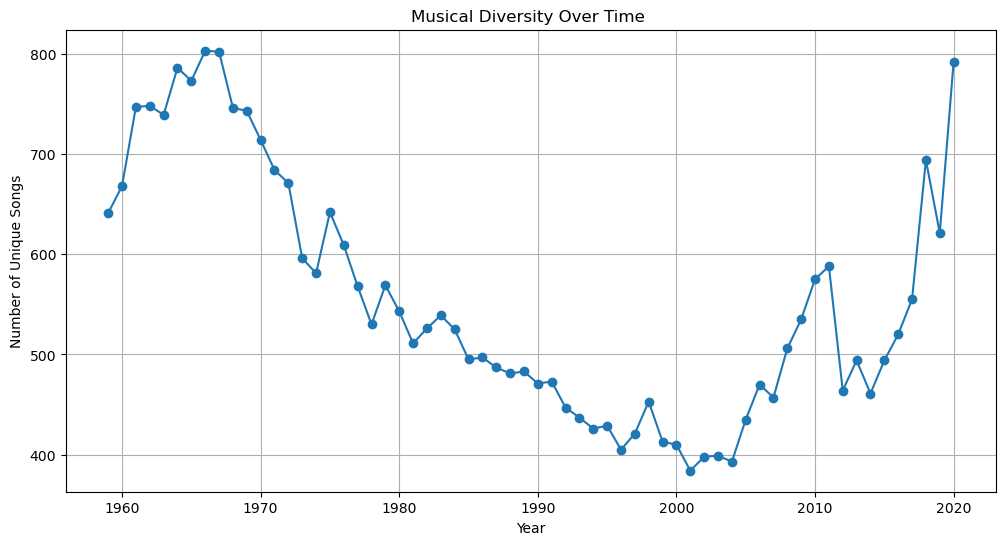

In [4]:
#Part B
import matplotlib.pyplot as plt
filtered_df = billboard_df[(billboard_df['year'] != 1958) & (billboard_df['year'] != 2021)]
unique_songs_per_year = filtered_df.groupby('year')['song'].nunique().reset_index(name='unique_songs')
plt.figure(figsize=(12, 6))
plt.plot(unique_songs_per_year['year'], unique_songs_per_year['unique_songs'], marker='o')
plt.xlabel('Year')
plt.ylabel('Number of Unique Songs')
plt.title('Musical Diversity Over Time ')
plt.grid(True)
plt.show()

#The line graph shows the number of diverse songs appearing on the Top 100  from 1959 to 2020. 
# The Diversity got pretty low in the 90's but after 2000 it just kept going up, Interestlingly enough there 
#is much diversity in the 70's as there is now according to the line graph
#indicating a broader range of popular songs in those periods.


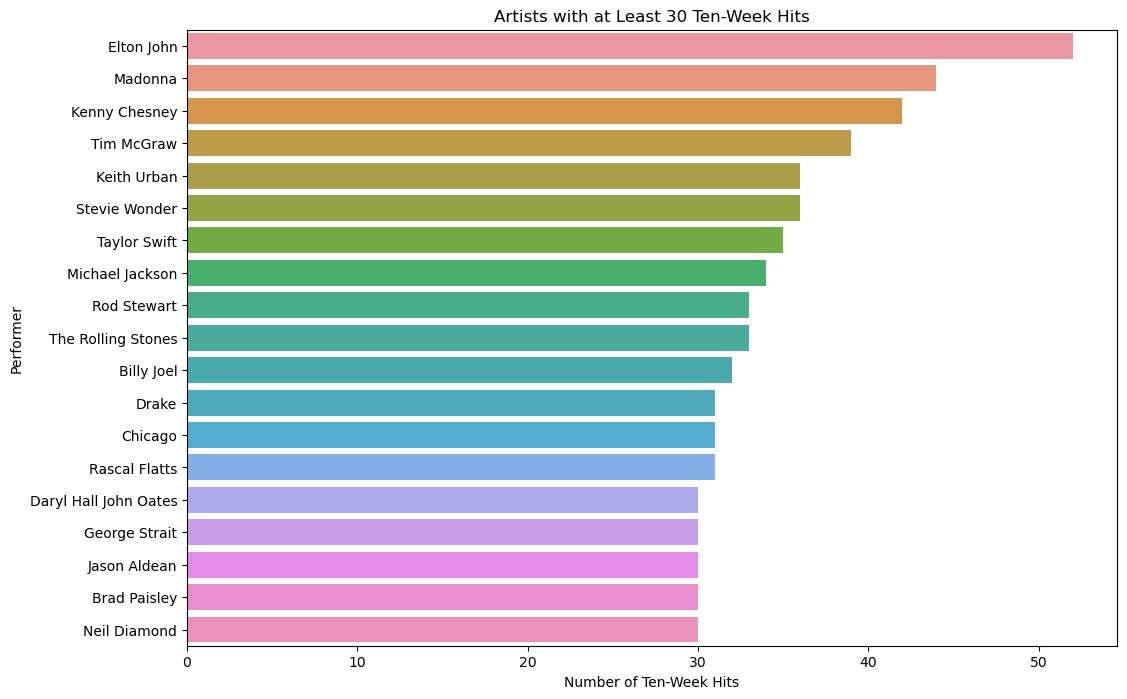

In [5]:
#Part c
import seaborn as sns
ten_week_hits = billboard_df[billboard_df['weeks_on_chart'] >= 10]
artist_hits = ten_week_hits.groupby('performer')['song'].nunique().reset_index(name='ten_week_hits')
top_artists = artist_hits[artist_hits['ten_week_hits'] >= 30]
plt.figure(figsize=(12, 8))
sns.barplot(data=top_artists.sort_values(by='ten_week_hits', ascending=False), x='ten_week_hits', y='performer')
plt.xlabel('Number of Ten-Week Hits')
plt.ylabel('Performer')
plt.title('Artists with at Least 30 Ten-Week Hits')
plt.show()


#The bar plot show the artists with at least 30 ten-week hits on the Top 100 chart .
#Elton John has the highest number of ten-week hits by a decent amount. 

27.6
25.03


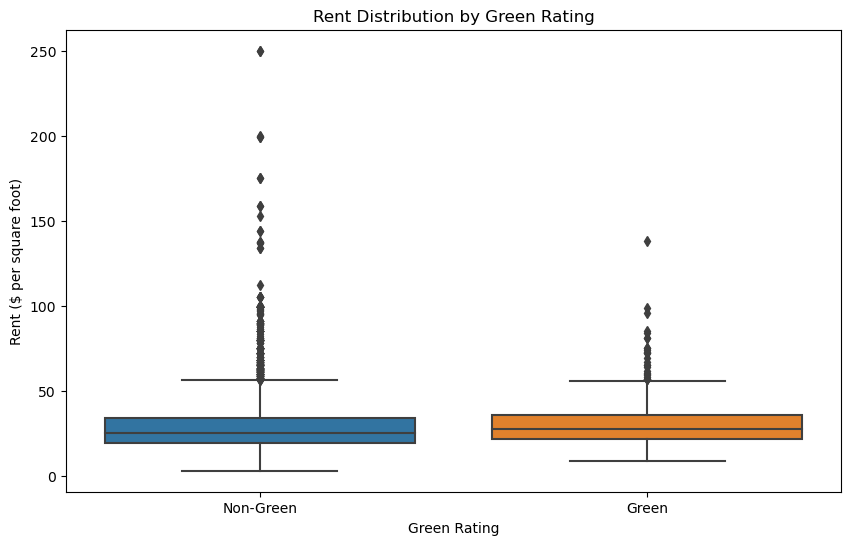

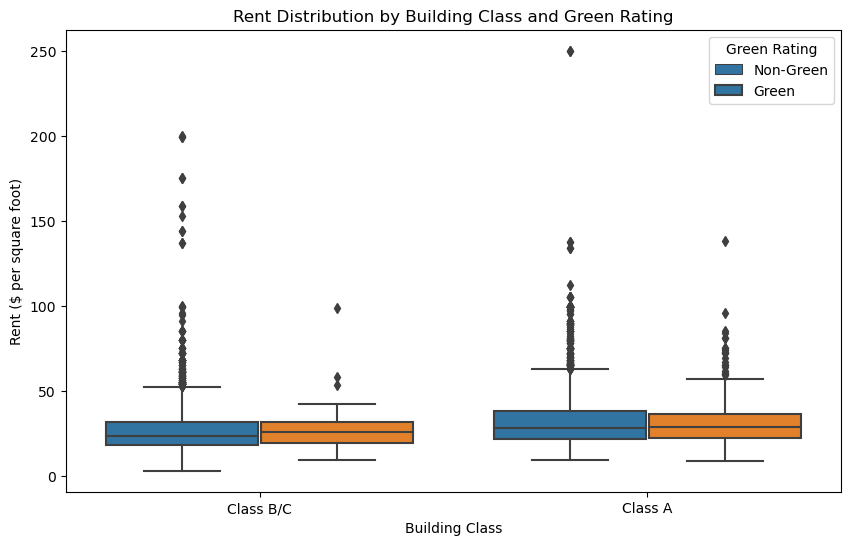

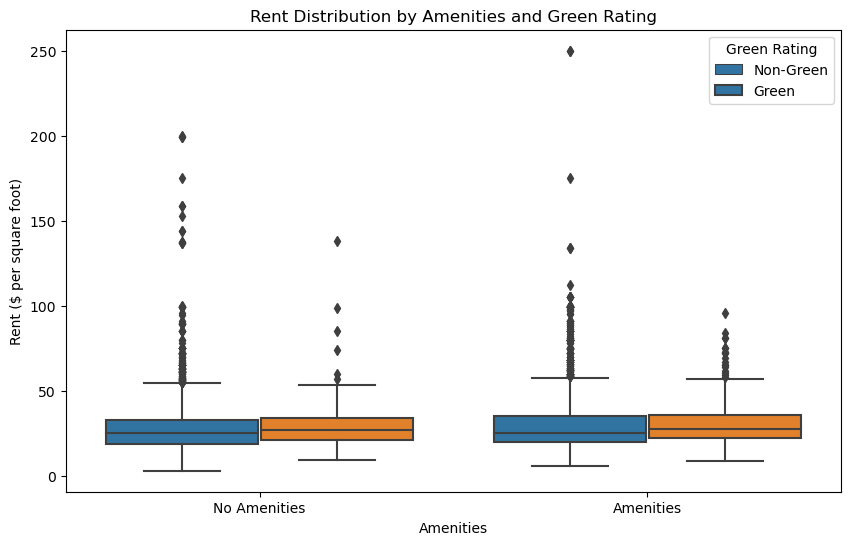

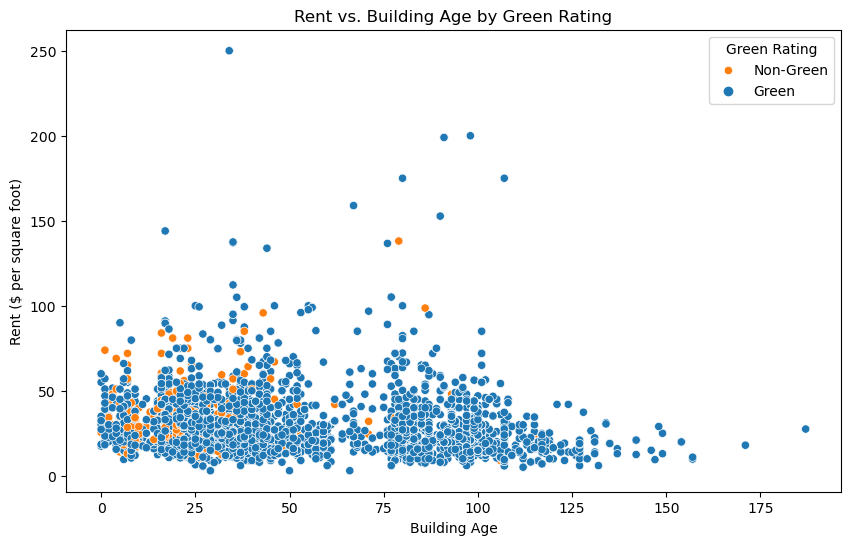

In [6]:
#Visual story telling part 1: green buildings

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
greenbuildings_df = pd.read_csv('greenbuildings.csv')
filtered_df = greenbuildings_df[greenbuildings_df['leasing_rate'] >= 10]
green_buildings = filtered_df[filtered_df['green_rating'] == 1]
non_green_buildings = filtered_df[filtered_df['green_rating'] == 0]
median_rent_green = green_buildings['Rent'].median()
median_rent_non_green = non_green_buildings['Rent'].median()
print(median_rent_green )
print(median_rent_non_green)

plt.figure(figsize=(10, 6))
sns.boxplot(data=filtered_df, x='green_rating', y='Rent')
plt.xlabel('Green Rating')
plt.ylabel('Rent ($ per square foot)')
plt.title('Rent Distribution by Green Rating')
plt.xticks([0, 1], ['Non-Green', 'Green'])
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data=filtered_df, x='class_a', y='Rent', hue='green_rating')
plt.xlabel('Building Class')
plt.ylabel('Rent ($ per square foot)')
plt.title('Rent Distribution by Building Class and Green Rating')
plt.xticks([0, 1], ['Class B/C', 'Class A'])
plt.legend(title='Green Rating', labels=['Non-Green', 'Green'])
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data=filtered_df, x='amenities', y='Rent', hue='green_rating')
plt.xlabel('Amenities')
plt.ylabel('Rent ($ per square foot)')
plt.title('Rent Distribution by Amenities and Green Rating')
plt.xticks([0, 1], ['No Amenities', 'Amenities'])
plt.legend(title='Green Rating', labels=['Non-Green', 'Green'])
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=filtered_df, x='age', y='Rent', hue='green_rating')
plt.xlabel('Building Age')
plt.ylabel('Rent ($ per square foot)')
plt.title('Rent vs. Building Age by Green Rating')
plt.legend(title='Green Rating', labels=['Non-Green', 'Green'])
plt.show()


In [7]:
#I agree with the stats guru as the evidence does 
#show green buildings have higher median rents. However he's overlooking important variables 
# like building class,and amenitieswhich impact the rent as well.

#For instance the boxplots show that class A has somewhat higher rent and 
#inside the classes green building still have higher rent.
#Same thing with amenities.However  Green buildings also  have 
#higher rents across different ages of building.
#Ultimately he should've told her how green interacts with other variables.



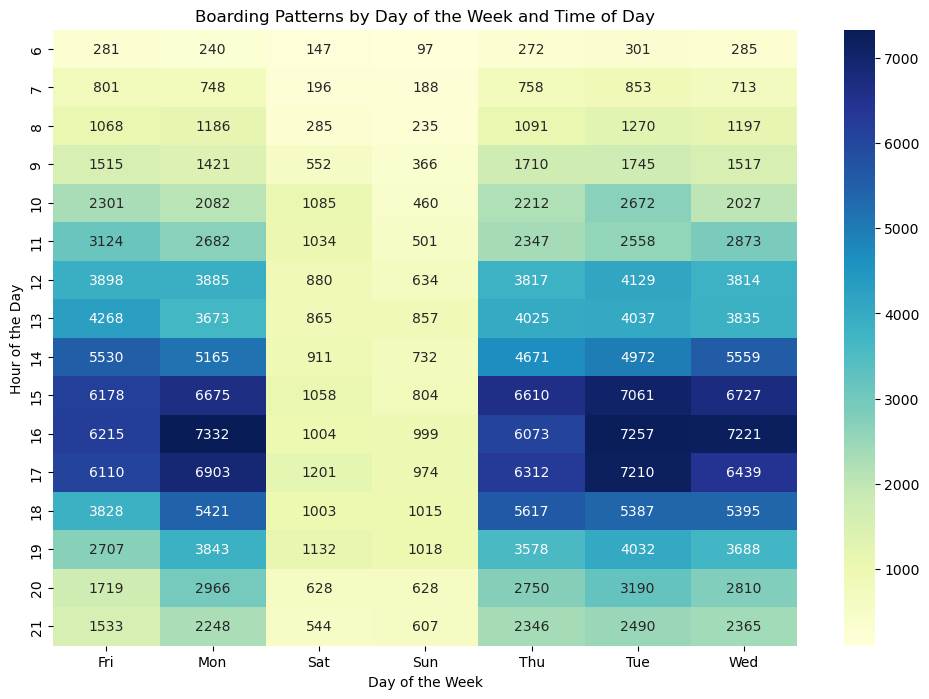

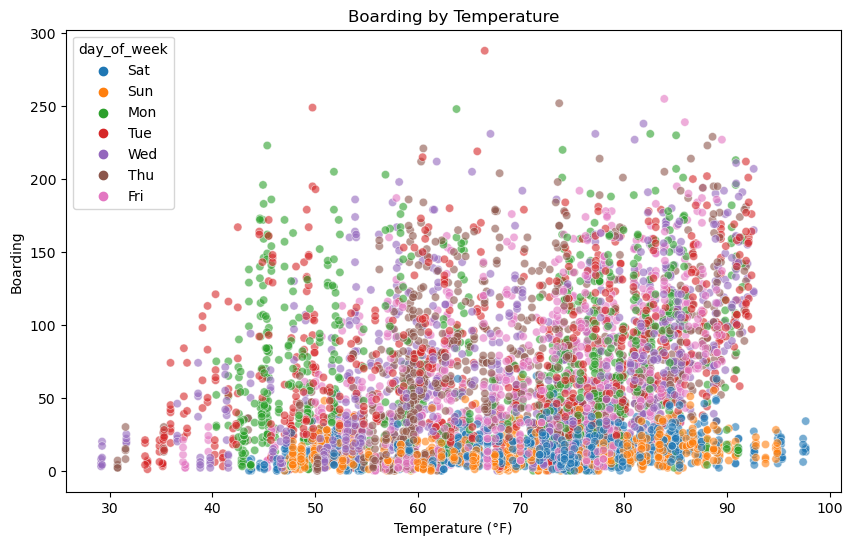

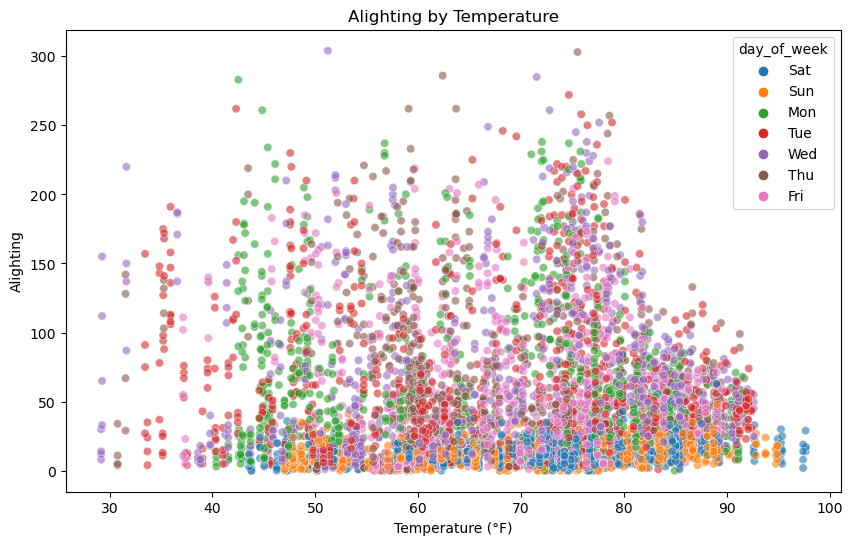

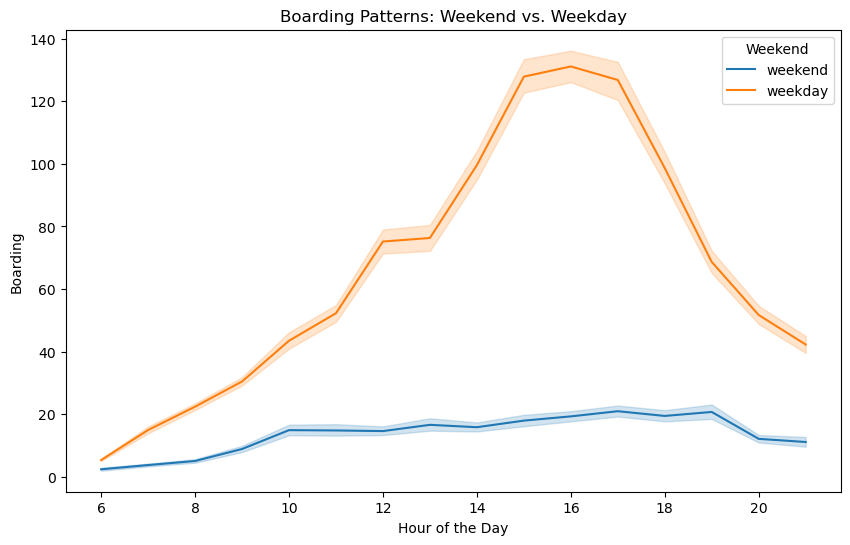

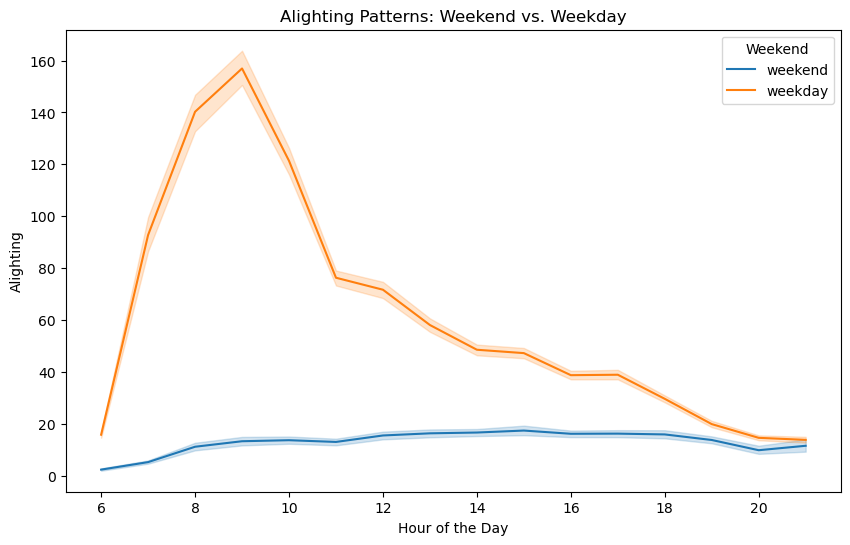

In [8]:
#Visual story telling part 2: Capital Metro data

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


capmetro_df = pd.read_csv('capmetro_UT.csv')
capmetro_df['timestamp'] = pd.to_datetime(capmetro_df['timestamp'])
capmetro_df['day'] = capmetro_df['timestamp'].dt.day_name()
capmetro_df['hour'] = capmetro_df['timestamp'].dt.hour
capmetro_df['month'] = capmetro_df['timestamp'].dt.month_name()
capmetro_df.head()
pivot_boarding = capmetro_df.pivot_table(index='hour_of_day', columns='day_of_week', values='boarding', aggfunc='sum')


plt.figure(figsize=(12, 8))
sns.heatmap(pivot_boarding, cmap="YlGnBu", annot=True, fmt="d")
plt.title('Boarding Patterns by Day of the Week and Time of Day')
plt.xlabel('Day of the Week')
plt.ylabel('Hour of the Day')
plt.show()

#This heatmap shows the  number of boardings for each hour of the day for the week.
# It shows peak boarding times, especially on weekdays around morning (8-9 AM) and evening (5-6 PM) rush hours,
#showing higher numbers during time when people are going to work and going home. There is lower ridership on weekends.

plt.figure(figsize=(10, 6))
sns.scatterplot(data=capmetro_df, x='temperature', y='boarding', hue='day_of_week', alpha=0.6)
plt.title('Boarding by Temperature')
plt.xlabel('Temperature (°F)')
plt.ylabel('Boarding')
plt.show()

#The scatter plot shows the relationship between temperature and boarding, colored by day of the week. There doesn't seem to be 
#a strong correlation between temperature and ridership, but if there was a pattern between temp and boarding this graph
#would show it


plt.figure(figsize=(10, 6))
sns.scatterplot(data=capmetro_df, x='temperature', y='alighting', hue='day_of_week', alpha=0.6)
plt.title('Alighting by Temperature')
plt.xlabel('Temperature (°F)')
plt.ylabel('Alighting')
plt.show()

#Its similar to the boarding scatter plot, and what I mean by that is that it shows the relationship between 
#temperature and alighting.
#and we see that there is no strong correlation, but like in the previous graph we can see if their was a pattern.

plt.figure(figsize=(10, 6))
sns.lineplot(data=capmetro_df, x='hour_of_day', y='boarding', hue='weekend')
plt.title('Boarding Patterns: Weekend vs. Weekday')
plt.xlabel('Hour of the Day')
plt.ylabel('Boarding')
plt.legend(title='Weekend')
plt.show()

#This line plot shows boarding patterns between weekends and weekdays during different times.
#It shows that weekday boardings are at its highest at the evening hours, while weekend boardings are more
#even.

plt.figure(figsize=(10, 6))
sns.lineplot(data=capmetro_df, x='hour_of_day', y='alighting', hue='weekend')
plt.title('Alighting Patterns: Weekend vs. Weekday')
plt.xlabel('Hour of the Day')
plt.ylabel('Alighting')
plt.legend(title='Weekend')
plt.show()

# this plot compares alighting patterns between weekends and weekdays. It is highest in the morning around 8am, 
#its alot more even on weekends.


C:\Users\16155\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


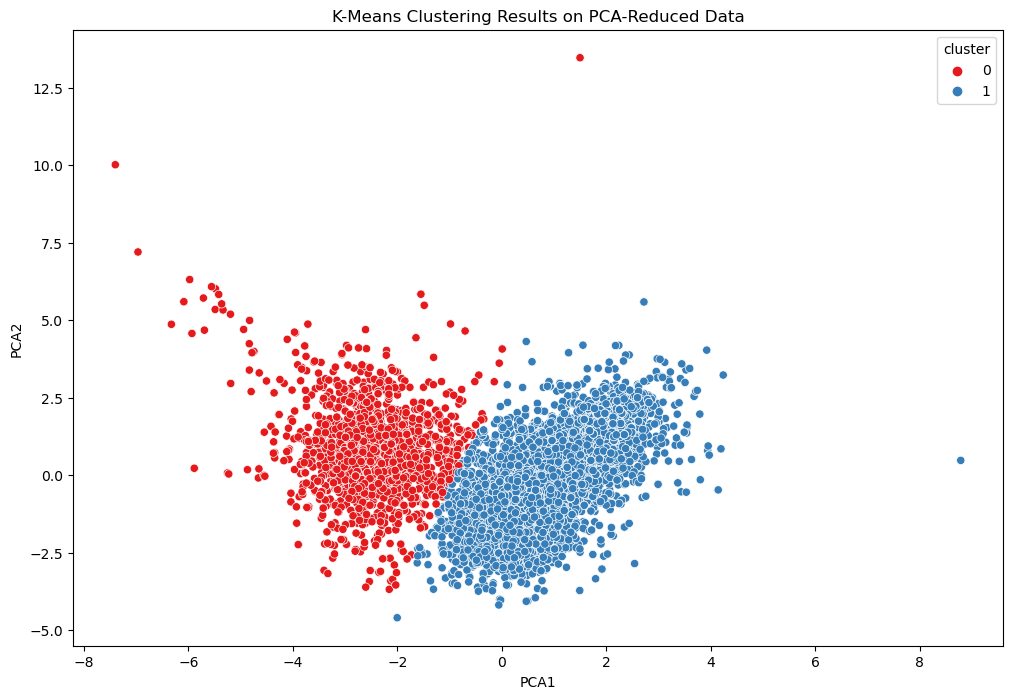

C:\Users\16155\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


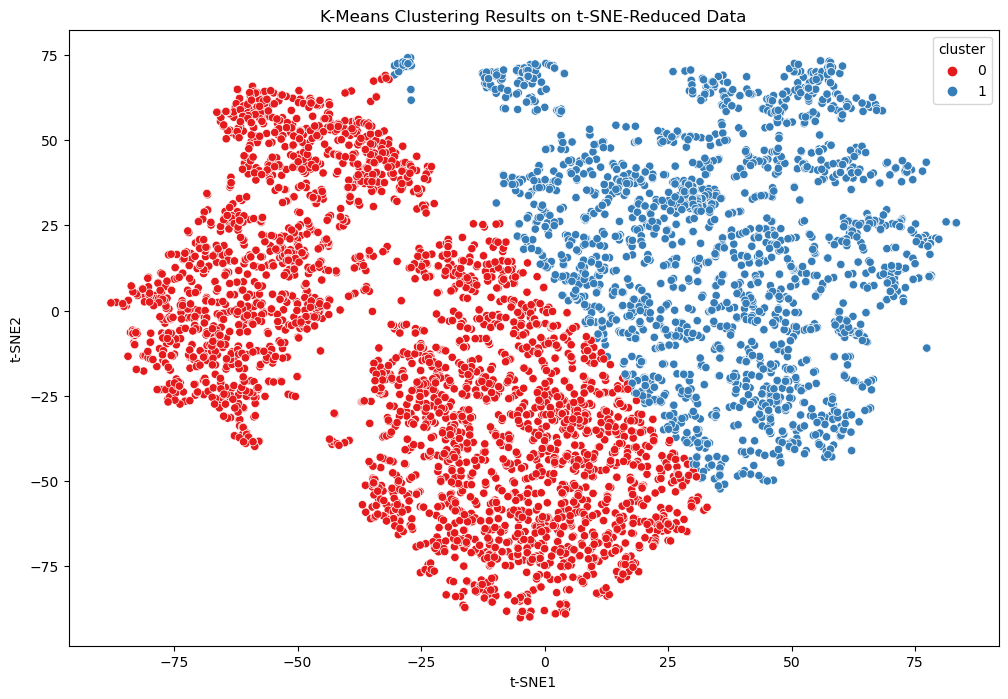

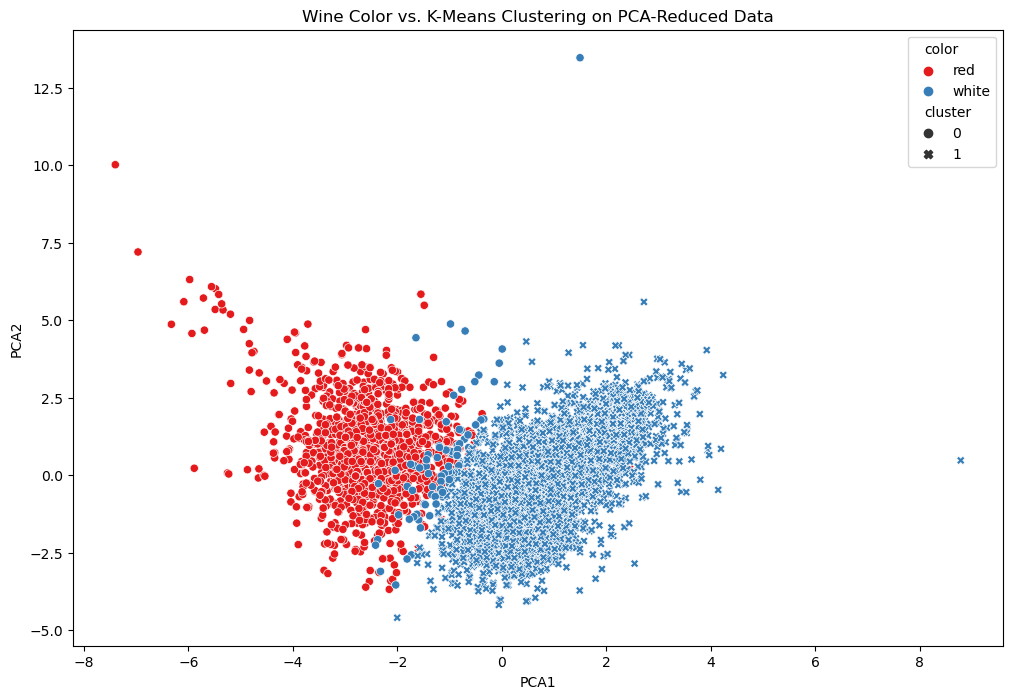

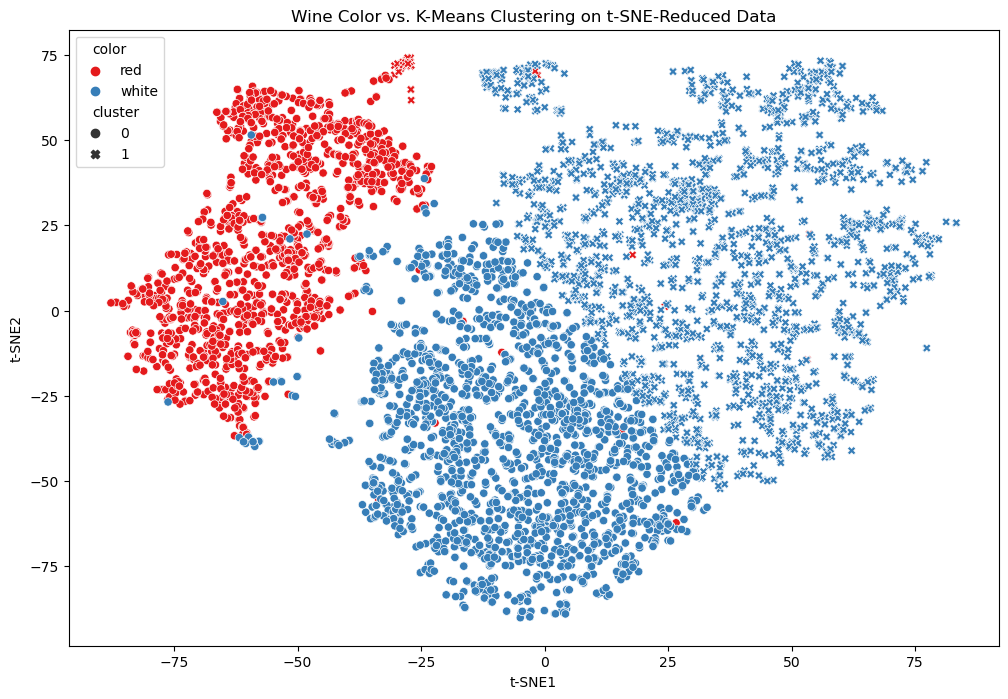

In [2]:
#Clustering and dimensionality reduction
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

file_path_wine = 'wine.csv'  
wine_df = pd.read_csv(file_path_wine)
features = wine_df.drop(columns=['color', 'quality'])
labels_color = wine_df['color']
labels_quality = wine_df['quality']
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)
pca = PCA(n_components=2)
pca_result = pca.fit_transform(features_scaled)
pca_df = pd.DataFrame(data=pca_result, columns=['PCA1', 'PCA2'])
pca_df['color'] = labels_color
pca_df['quality'] = labels_quality
kmeans_pca = KMeans(n_clusters=2, random_state=42)
kmeans_labels_pca = kmeans_pca.fit_predict(pca_df[['PCA1', 'PCA2']])
pca_df['cluster'] = kmeans_labels_pca

plt.figure(figsize=(12, 8))
sns.scatterplot(x='PCA1', y='PCA2', hue='cluster', data=pca_df, palette='Set1')
plt.title('K-Means Clustering Results on PCA-Reduced Data')
plt.show()

tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(features_scaled)
tsne_df = pd.DataFrame(data=tsne_result, columns=['t-SNE1', 't-SNE2'])
tsne_df['color'] = labels_color
tsne_df['quality'] = labels_quality
kmeans_tsne = KMeans(n_clusters=2, random_state=42)
kmeans_labels_tsne = kmeans_tsne.fit_predict(tsne_df[['t-SNE1', 't-SNE2']])
tsne_df['cluster'] = kmeans_labels_tsne


plt.figure(figsize=(12, 8))
sns.scatterplot(x='t-SNE1', y='t-SNE2', hue='cluster', data=tsne_df, palette='Set1')
plt.title('K-Means Clustering Results on t-SNE-Reduced Data')
plt.show()


plt.figure(figsize=(12, 8))
sns.scatterplot(x='PCA1', y='PCA2', hue='color', style='cluster', data=pca_df, palette='Set1')
plt.title('Wine Color vs. K-Means Clustering on PCA-Reduced Data')
plt.show()

plt.figure(figsize=(12, 8))
sns.scatterplot(x='t-SNE1', y='t-SNE2', hue='color', style='cluster', data=tsne_df, palette='Set1')
plt.title('Wine Color vs. K-Means Clustering on t-SNE-Reduced Data')
plt.show()

# PCA made the most sense as it reduce dimensionality while preserving 
#the variance for the data. Through PCA we can see a scatterplot where 
# red and white wine have two distinct scatterplots. 
#The PCA is able to differ between the two wines using only unsupervised information
#I enchanced the visual  by using color gradients to represent wine quality.
# It was also able to differ the quality of wines. There was also varaince shown as well.
#PCA can distinguish red from white and distinguish quality.


First few rows of the dataset:
  Unnamed: 0  chatter  current_events  travel  photo_sharing  uncategorized  \
0  hmjoe4g3k        2               0       2              2              2   
1  clk1m5w8s        3               3       2              1              1   
2  jcsovtak3        6               3       4              3              1   
3  3oeb4hiln        1               5       2              2              0   
4  fd75x1vgk        5               2       0              6              1   

   tv_film  sports_fandom  politics  food  ...  religion  beauty  parenting  \
0        1              1         0     4  ...         1       0          1   
1        1              4         1     2  ...         0       0          0   
2        5              0         2     1  ...         0       1          0   
3        1              0         1     0  ...         0       1          0   
4        0              0         2     0  ...         0       0          0   

   dating  school  

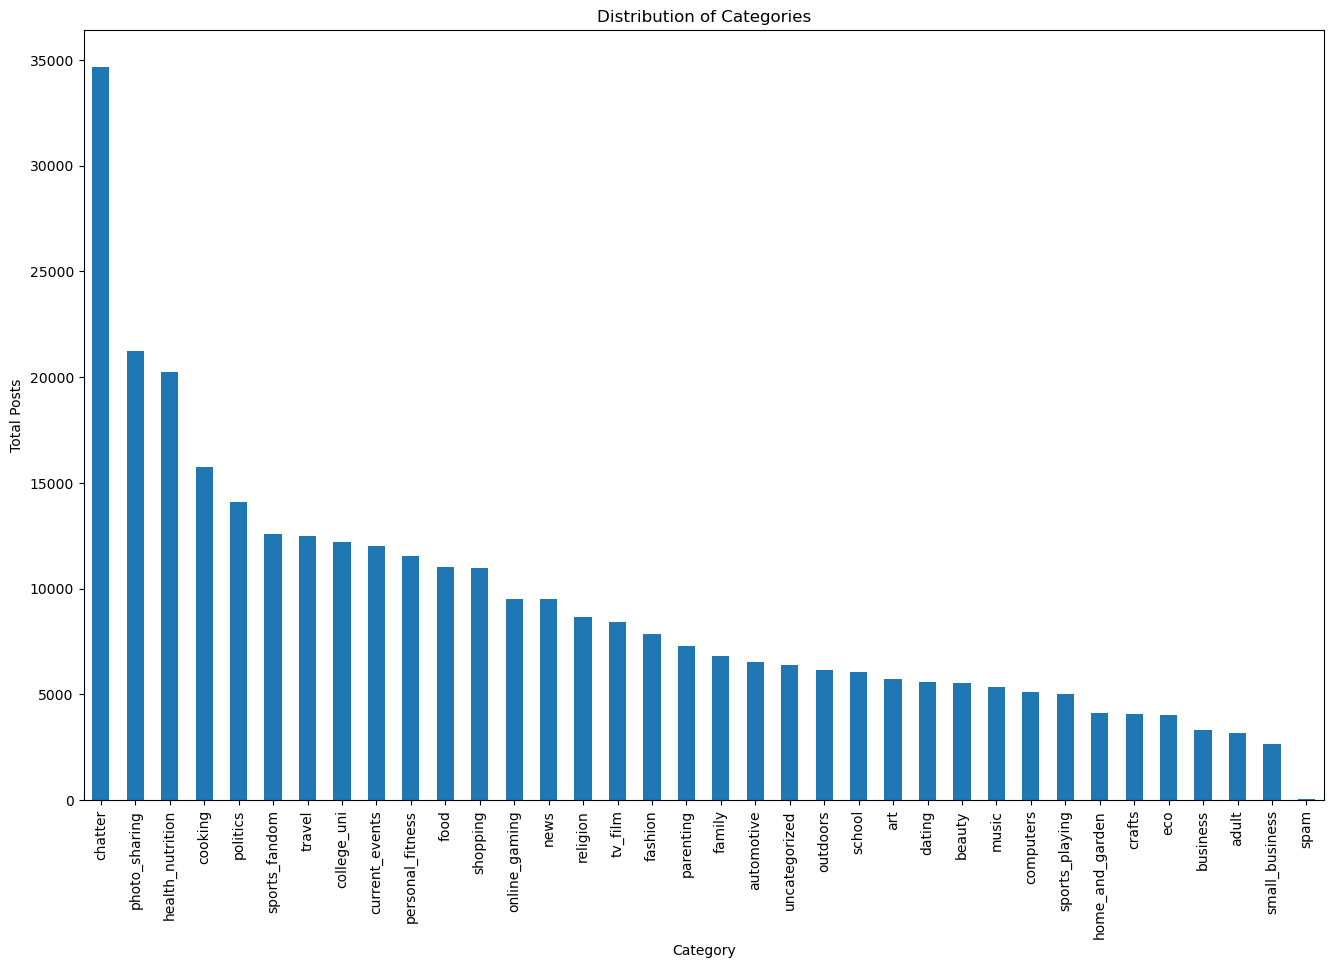

C:\Users\16155\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


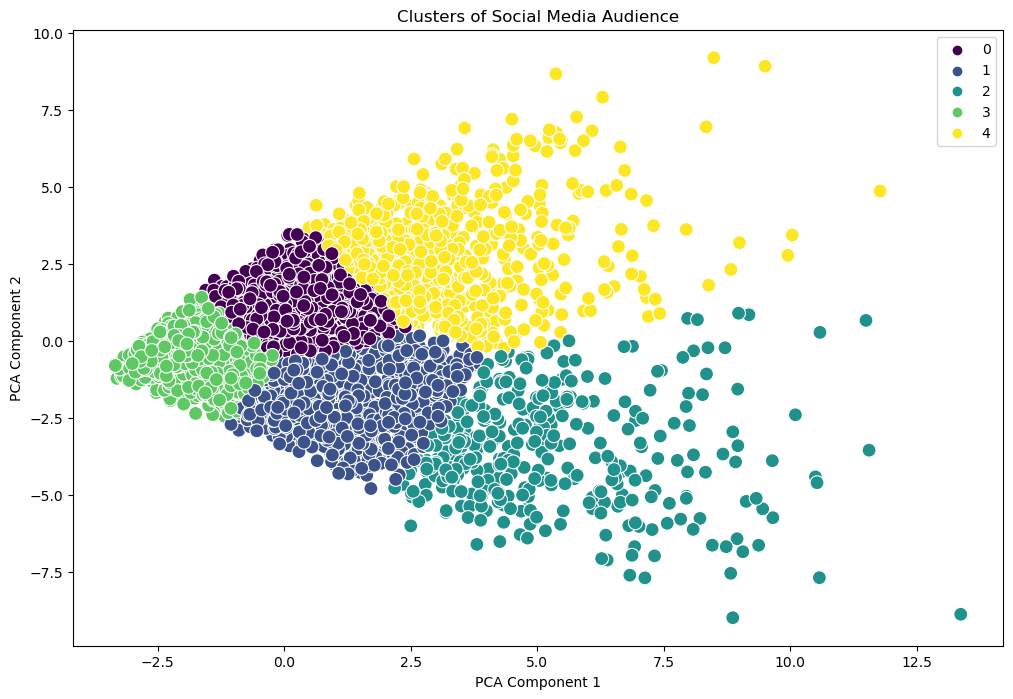

C:\Users\16155\AppData\Local\Temp\ipykernel_9628\1535948710.py:61: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_summary = data.groupby('Cluster').mean()


chatter  current_events    travel  photo_sharing  uncategorized  \
Cluster                                                                     
0        5.585268        1.709821  1.784821       3.582589       0.982589   
1        3.695076        1.521780  1.694129       1.862689       0.673295   
2        4.266319        1.874674  2.041775       2.830287       0.814621   
3        3.229939        1.270499  1.147651       1.547709       0.616574   
4        7.158505        1.960052  2.565722       6.283505       1.380155   

          tv_film  sports_fandom  politics      food    family  ...  religion  \
Cluster                                                         ...             
0        1.339732       0.974554  1.951786  1.108929  0.664286  ...  0.548661   
1        0.978220       3.575758  2.732955  2.638258  1.597538  ...  2.710227   
2        1.279373       7.430809  2.041775  5.741514  3.031332  ...  6.608355   
3        0.734170       0.753720  1.079662  0.623869  0.468631  ...  0.342574   
4        1.798969       1.515464  3.038660  1.814433  1.117268  ...  1.079897   

           beauty  parenting    dating    school  personal_fitness   fashion  \
Cluster                                                                        
0        0.761161   0.532143  0.981250  0.588393          2.087500  1.234375   
1        0.568182   2.089015  0.572917  1.460227          0.979167  0.564394   
2        1.407311   5.174935  0.913838  3.443864          1.775457  1.274151   
3        0.245988   0.324190  0.339656  0.289174          0.724540  0.345783   
4        2.411082   0.993557  1.657216  1.135309          3.416237  3.635309   

         small_business      spam     adult  
Cluster                                      
0              0.416964  0.007589  0.438839  
1              0.321023  0.008523  0.440341  
2              0.456919  0.005222  0.456919  
3              0.192296  0.004961  0.334695  
4              0.701031  0.007732  0.527062  

[5 rows x 36 columns]

In [16]:
#market segmentation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

file_path = 'social_marketing.csv'
data = pd.read_csv(file_path)
print("First few rows of the dataset:")
print(data.head())
print("\nBasic information about the dataset:")
print(data.info())
print("\nSummary statistics of the dataset:")
print(data.describe())
print("\nMissing values in the dataset:")
print(data.isnull().sum())

plt.figure(figsize=(16, 10))
data.iloc[:, 1:].sum().sort_values(ascending=False).plot(kind='bar')
plt.title('Distribution of Categories')
plt.xlabel('Category')
plt.ylabel('Total Posts')
plt.show()

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data.iloc[:, 1:])
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(data_pca)
data['Cluster'] = clusters


plt.figure(figsize=(12, 8))
sns.scatterplot(x=data_pca[:, 0], y=data_pca[:, 1], hue=clusters, palette='viridis', s=100)
plt.title('Clusters of Social Media Audience')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()


cluster_summary = data.groupby('Cluster').mean()
cluster_summary.to_csv('cluster_summary.csv')
cluster_summary

#My analysis saw interesting parts. A segment characterized by high engangement
#in categories like politics and fashion represented very active and diverse user.
#Another segment had balanced engangement with the categories meaning they most
#likely have varied interests. I also noticed a less active segment with specific interests 
#and a sport enthusiast segment that takes part in politics. Lastly I saw segments such as sports that like to share photos.

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\16155\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\16155\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
C:\Users\16155\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\16155\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\16155\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warni

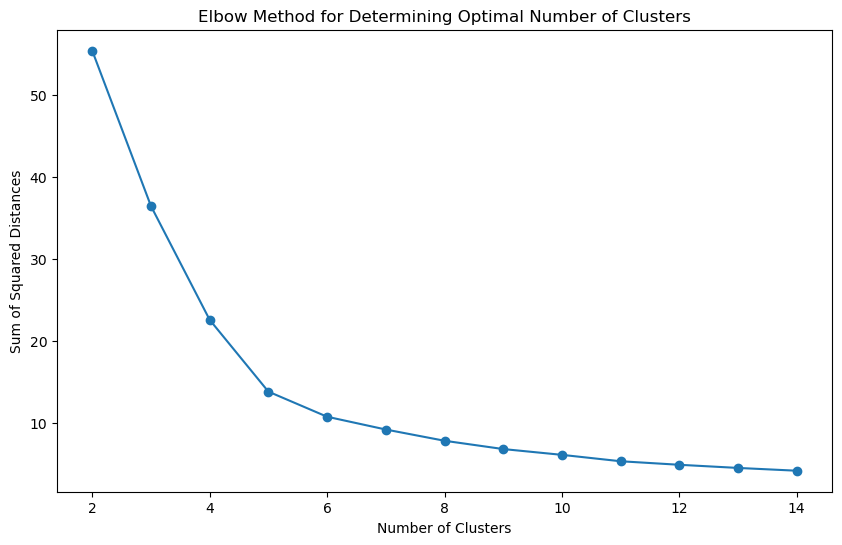

C:\Users\16155\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


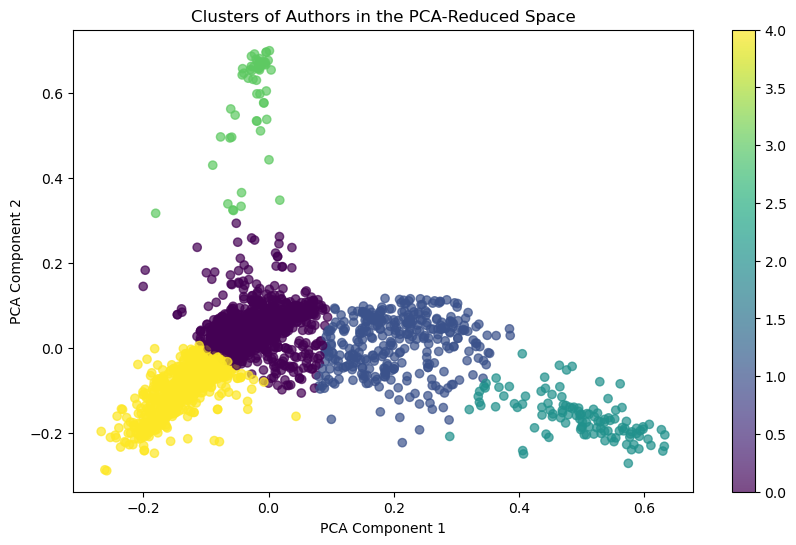

Cluster
0    AaronPressman, AlanCrosby, AlexanderSmith, Ben...
1    BenjaminKangLim, GrahamEarnshaw, JaneMacartney...
2    JaneMacartney, JimGilchrist, LynneO'Donnell, M...
3                              DavidLawder, ToddNissen
4    AlanCrosby, AlexanderSmith, BernardHickey, Bra...
Name: Author, dtype: object
Cluster 1 top words: year, industry, companies, internet, market, percent, new, company, would, said
Cluster 2 top words: tonnes, official, taiwan, kong, hong, wang, beijing, chinese, said, china
Cluster 3 top words: handover, patten, beijing, said, chinese, legislature, tung, china, hong, kong
Cluster 4 top words: union, automaker, auto, parts, strike, plant, plants, uaw, workers, gm
Cluster 5 top words: share, pounds, sales, billion, company, quarter, year, percent, million, said


In [3]:
#The reuters corpus
import os
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
import nltk


train_dir = 'C:/Users/16155/Dropbox/pc/Downloads/ReutersC50/C50train'
test_dir = 'C:/Users/16155/Dropbox/pc/Downloads/ReutersC50/C50test'


def load_data(directory):
    data = []
    labels = []
    for author in os.listdir(directory):
        author_dir = os.path.join(directory, author)
        if os.path.isdir(author_dir):
            for file in os.listdir(author_dir):
                file_path = os.path.join(author_dir, file)
                with open(file_path, 'r', encoding='latin1') as f:
                    text = f.read()
                    data.append(text)
                    labels.append(author)
    return data, labels

train_data, train_labels = load_data(train_dir)
test_data, test_labels = load_data(test_dir)


stop_words = set(stopwords.words('english') + list(string.punctuation))

def preprocess(text):
    tokens = word_tokenize(text.lower())
    tokens = [word for word in tokens if word.isalpha() and word not in stop_words]
    return ' '.join(tokens)

train_data = [preprocess(text) for text in train_data]
test_data = [preprocess(text) for text in test_data]


vectorizer = TfidfVectorizer(max_features=2000)
X_train = vectorizer.fit_transform(train_data)
X_test = vectorizer.transform(test_data)


pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train.toarray())


sse = []
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_train_pca)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(2, 15), sse, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method for Determining Optimal Number of Clusters')
plt.show()


optimal_clusters = 5  
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
clusters = kmeans.fit_predict(X_train_pca)


plt.figure(figsize=(10, 6))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=clusters, cmap='viridis', alpha=0.7)
plt.title('Clusters of Authors in the PCA-Reduced Space')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar()
plt.show()

author_clusters = pd.DataFrame({'Author': train_labels, 'Cluster': clusters})
print(author_clusters.groupby('Cluster')['Author'].apply(lambda x: ', '.join(x.unique())))


def get_top_words(cluster_data, vectorizer, n_top_words=10):
    mean_tfidf = np.mean(cluster_data, axis=0)
    top_words_indices = mean_tfidf.argsort()[-n_top_words:]
    top_words = [vectorizer.get_feature_names_out()[i] for i in top_words_indices]
    return top_words

for i in range(optimal_clusters):
    cluster_data = X_train[clusters == i]
    top_words = get_top_words(cluster_data.toarray(), vectorizer)
    print(f"Cluster {i+1} top words: {', '.join(top_words)}")



In [1]:
#Question: Can we identify unique clusters of authors based on the content of their works and what 
#insights can we see from these clusters.

#Approach: I started off with data preprocessing to remove stopwards
#,punctuation and lowercasing the text so I could remove noise. I then used TF-IDF to capture the importance of words relative to each document
# I then applied PCA to reduce the dimension to 2 components so I could visualize it easer. I then used
# an elbow plot and found out 5 clusters was good balance to capture unique groups. Lastly I analyzed the top words 
#associated with each cluster

#Results: Cluster 1 had alot of top words related to industry so I can take an educated guess and assume it has to 
#be professional articles about the market.
#Cluster 2 had top words with Asian locations so I assume the articles talk about shipping because of the word tonnes.
#Cluster 3 is similar to cluster 2 but I assume its more politics as one of the top words is legislature.
#cluster 4 is definetly about the automobile industry. Cluster 5 seems to be similar to 1 but more specific 
#as it seems to have finnance correlated words as the top word
# We were able to identify unique clusters and gain insights based off of what I said I above

#Conclusion: as I said before we were able to answer my questions. For instance we found clusters that focused on
#topics such as the chinese economy,automobile industry and finance in general
#This shows that authors content can be put into seperate clusters that reflect common interests. This could be 
#useful for creating content recommendation.
# My next steps would be to look at individual articles in the cluster or refine the clustering.

First few transactions:
[['citrus fruit', 'semi-finished bread', 'margarine', 'ready soups'], ['tropical fruit', 'yogurt', 'coffee'], ['whole milk'], ['pip fruit', 'yogurt', 'cream cheese ', 'meat spreads'], ['other vegetables', 'whole milk', 'condensed milk', 'long life bakery product']]
Filtered association rules:
      Base               Add   Support  Confidence      Lift
0     beef   root vegetables  0.017387    0.331395  3.040367
1  berries            yogurt  0.010574    0.318043  2.279848
2   butter   root vegetables  0.012913    0.233028  2.137897
3  chicken  other vegetables  0.017895    0.417062  2.155439
4  chicken   root vegetables  0.010880    0.253555  2.326221


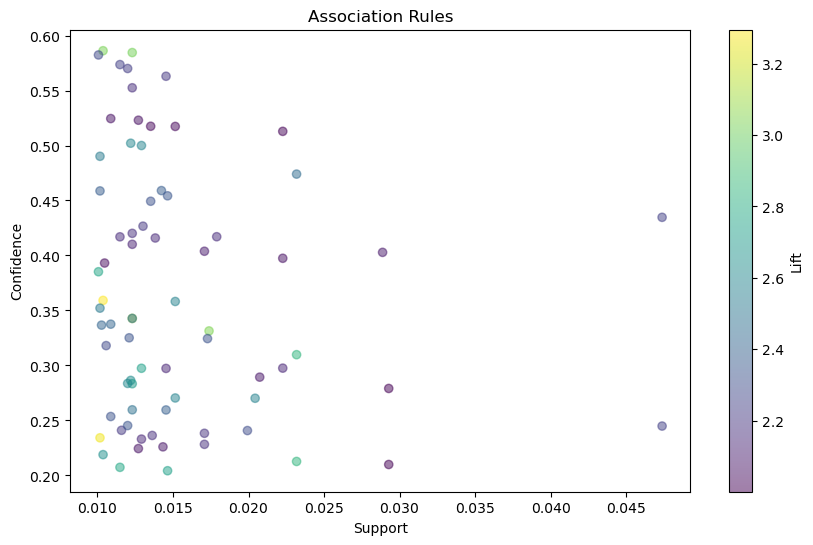

In [1]:
#association rule 
import pandas as pd
from apyori import apriori
import matplotlib.pyplot as plt


file_path = 'groceries.txt'
with open(file_path, 'r') as file:
    transactions = [line.strip().split(',') for line in file.readlines()]

print("First few transactions:")
print(transactions[:5])

results = list(apriori(transactions, min_support=0.01, min_confidence=0.2, min_lift=2, min_length=2))
def inspect(results):
    rules = []
    for result in results:
        for ordered_stat in result.ordered_statistics:
            if ordered_stat.confidence >= 0.2 and ordered_stat.lift >= 2:
                rules.append({
                    'Base': ', '.join(ordered_stat.items_base),
                    'Add': ', '.join(ordered_stat.items_add),
                    'Support': result.support,
                    'Confidence': ordered_stat.confidence,
                    'Lift': ordered_stat.lift
                })
    return pd.DataFrame(rules)

rules_df = inspect(results)
print("Filtered association rules:")
print(rules_df.head())
plt.figure(figsize=(10, 6))
plt.scatter(rules_df['Support'], rules_df['Confidence'], alpha=0.5, c=rules_df['Lift'], cmap='viridis')
plt.title('Association Rules')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.colorbar(label='Lift')
plt.show()


In [2]:
transactions

[['citrus fruit', 'semi-finished bread', 'margarine', 'ready soups'],
 ['tropical fruit', 'yogurt', 'coffee'],
 ['whole milk'],
 ['pip fruit', 'yogurt', 'cream cheese ', 'meat spreads'],
 ['other vegetables',
  'whole milk',
  'condensed milk',
  'long life bakery product'],
 ['whole milk', 'butter', 'yogurt', 'rice', 'abrasive cleaner'],
 ['rolls/buns'],
 ['other vegetables',
  'UHT-milk',
  'rolls/buns',
  'bottled beer',
  'liquor (appetizer)'],
 ['pot plants'],
 ['whole milk', 'cereals'],
 ['tropical fruit',
  'other vegetables',
  'white bread',
  'bottled water',
  'chocolate'],
 ['citrus fruit',
  'tropical fruit',
  'whole milk',
  'butter',
  'curd',
  'yogurt',
  'flour',
  'bottled water',
  'dishes'],
 ['beef'],
 ['frankfurter', 'rolls/buns', 'soda'],
 ['chicken', 'tropical fruit'],
 ['butter', 'sugar', 'fruit/vegetable juice', 'newspapers'],
 ['fruit/vegetable juice'],
 ['packaged fruit/vegetables'],
 ['chocolate'],
 ['specialty bar'],
 ['other vegetables'],
 ['butter milk

In [ ]:
# I applied the apriori algorthim to see assoocaiton rules and focused on combinations seen quite often.
#The minimum threshold was set at 1% for support and 20 % confidence and lift at 2 . 
#Any patterns seen were made sure to to be statiscally significant. 
# I saw that customers buying beef are very likely to buy root vegetables with a confidence of 33.1% and a lfit of 3.04
#meaning they are 3x more likely to be purchased together than by mere chance.
#Berries and yogurt and had a confidence of 31.8% and a lift of 2.28
#The scatterplot shows a cluster of pointss from .010 to .015, suggesting that the item combinations might 
#not be frequent but still have high association and different levels of confidence 

Epoch [1/10], Loss: 0.8084
Epoch [2/10], Loss: 0.4889
Epoch [3/10], Loss: 0.3997
Epoch [4/10], Loss: 0.3137
Epoch [5/10], Loss: 0.2495
Epoch [6/10], Loss: 0.1960
Epoch [7/10], Loss: 0.1440
Epoch [8/10], Loss: 0.1257
Epoch [9/10], Loss: 0.0965
Epoch [10/10], Loss: 0.0744
Test Set Accuracy: 0.8631


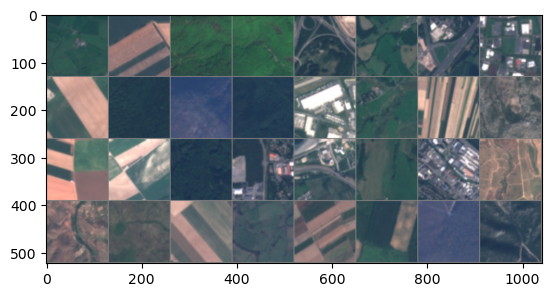

Predicted:  Pasture AnnualCrop Forest Forest HerbaceousVegetation Pasture Industrial Industrial


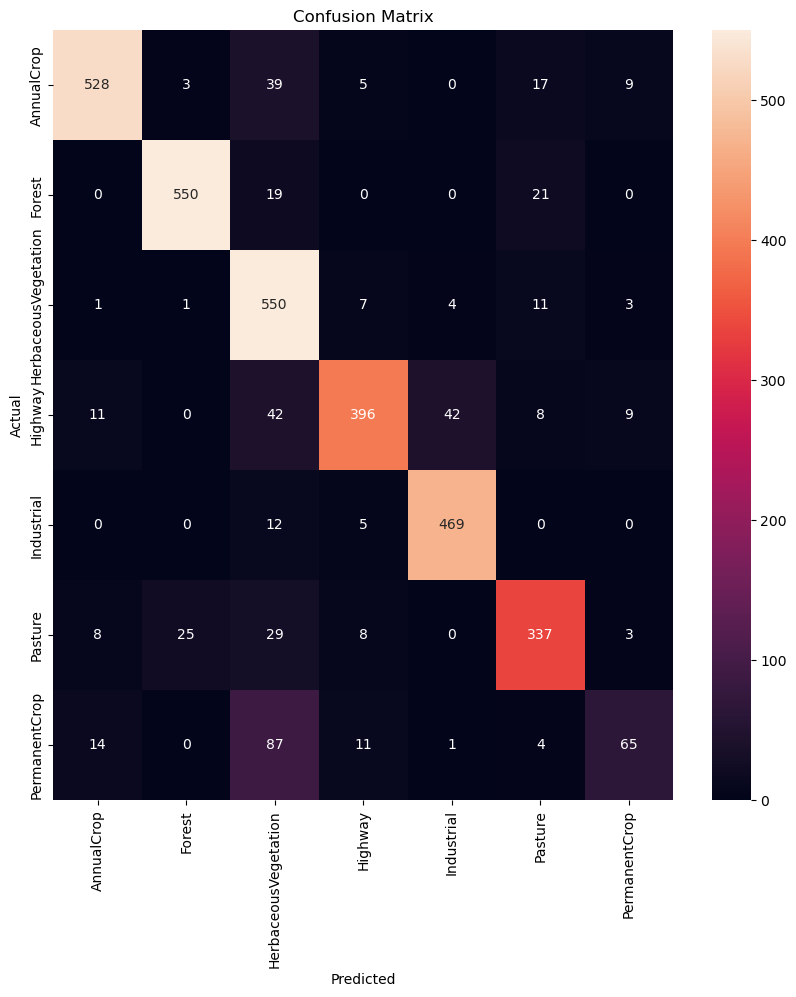

In [5]:
#Image classification and neural networks
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, models, utils
from torch.utils.data import DataLoader, random_split
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns

transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

data_dir = 'C:/Users/16155/STA380/data/EuroSAT_RGB'
dataset = datasets.ImageFolder(root=data_dir, transform=transform)

train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

class SimpleCNN(nn.Module):
    def __init__(self, num_classes):
        super(SimpleCNN, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.classifier = nn.Sequential(
            nn.Linear(64 * 16 * 16, 256),
            nn.ReLU(),
            nn.Linear(256, num_classes)
        )
        
    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), -1)
        x = self.classifier(x)
        return x

num_classes = len(dataset.classes)
model = SimpleCNN(num_classes=num_classes)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

num_epochs = 10

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for images, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}")
    
model.eval()
all_preds = []
all_labels = []

with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.numpy())
        all_labels.extend(labels.numpy())

accuracy = accuracy_score(all_labels, all_preds)
print(f"Test Set Accuracy: {accuracy:.4f}")

def imshow(img):
    img = img / 2 + 0.5  
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

dataiter = iter(test_loader)
images, labels = next(dataiter)
outputs = model(images)
_, preds = torch.max(outputs, 1)

imshow(utils.make_grid(images))
print('Predicted: ', ' '.join(f'{dataset.classes[preds[j]]}' for j in range(8)))
cm = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt="d", xticklabels=dataset.classes, yticklabels=dataset.classes)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


#

In [ ]:
#The neural network had an accuracy of 86.31%. The confusion matrix shows that
#the model peformed well in alot of categories with the highest accuracy being in forest and annualcrop images
#However there were some misclassification between similar categories such herbaceousvegetation and pasture. 
#This shows there is some room for improvement for areas that look similar